<a href="https://colab.research.google.com/github/atharva0300/Learn-Cuda/blob/main/learn_cuda_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install nvcc4jupyter

In [29]:
%load_ext nvcc4jupyter

The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


In [30]:
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-7 60 --slave /usr/bin/g++ g++ /usr/bin/g++-7

update-alternatives: error: alternative path /usr/bin/gcc-7 doesn't exist


In [31]:
!gcc --version

gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



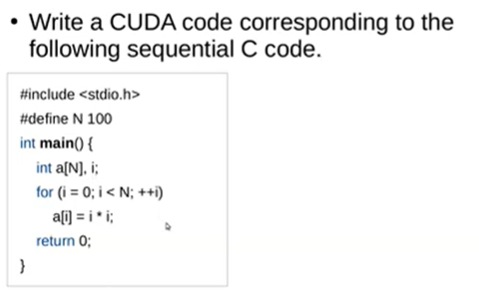

In [32]:
%%cuda
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

#define N 100

__global__ void fun(int *a){
    // the da pointer is called by another value 'a'
    // the 'a' is pointer ( da ) which is pointing the the memory in the gpu
    // threadIdx.x is the id of the current thread
    // storing the threadIdx.x * threadIdx.x value to the array index value
     a[threadIdx.x] = threadIdx.x * threadIdx.x;
}
int main(){

  // declare the arary on the cpu
  // the da is a pointer on the cpu which is pointing to the gpu ( look ahead )
  int a[N], *da;
  int i;
  // declaring separate memeory for the array in the gpu
  // size -> N * size of int
  // da will now point to the new memory location of the gpu
  cudaMalloc(&da, N * sizeof(int));

  // launch teh gpu function and pasd the pointer
  // 1 block and N threads
  // N is 100 here, so 100 threads
  fun<<<1 , N>>>(da);

  // transfers the data from cpu to gpu as well as the gpu to the cpu
  // a -> destination address
  // da -> source address
  // cudaMemcpyDeviceToHost -> the teansfer of the data from Device to host
  // therefore, transferring the data from the 'da' to the array 'a'
  cudaMemcpy(a , da , N * sizeof(int) , cudaMemcpyDeviceToHost);

  // print the array
  for(i=0;i<N;i++){
      printf("%d\n" , a[i]);
  }
  printf("on cpu\n");
  return 0;

  // difference in malloc() and the cudamalloc()
  // cudamalloc() done on the gpu and malloc() done on regular cpu
  // the pointer da will hold the addrress of the memory which is allocated on the gpu
  // the da is passed by value and not passed by reference in the launch of hte funciton
  // the scope of the array 'a' is limited to the cpu
  // the scope of the pointer 'a'  in the function fun() is limited to the fun()
  // cudamalloc() will create the memory on the gpus DRAM
  // the allocation of the memory is done on the gpu, just the pointer to the memory is in the cpu
  // which is 'da'

  // there is no convinient way of returning anything from the gpu kernel to the host cpu
  // the cudamemory does not get freed here automatically
  // to free the memory, we have to free the memory using a command ( function / statement )

  // no cudaDevuceSynchronze() because we are already doing the cudamemcpy which will
  // wait for the gpu kernel to finish the computation and then transfer back the memory to the
  // cpu host
  // although adding cudadeviceSynchronize will not create any errors
  // adding it is a good code habit

}

782779344
31746
782779384
31746
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
on cpu



In [33]:
%%cuda
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

const char *msg = "Hello world\n";
// this *msg pointer is declared on the cpu
// this string is not there on the gpu

__global__ void dbkernel(){
    // printing the msg on the gpu gives error
    // because the msg is undefined in the gpu memory
    // the cpu and the gpu memory is separate
    printf(msg);
}

int main(){
    dbkernel<<<1 , 32>>>();
    cudaDeviceSynchronize();

    return 0;
}

/tmp/tmplhy7x6ez/a31c4d99-ba25-4dcd-b448-515d1a2fece2/single_file.cu(13): warning #20094-D: a host variable "msg" cannot be directly read in a device function
      printf(msg);
             ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"

/tmp/tmplhy7x6ez/a31c4d99-ba25-4dcd-b448-515d1a2fece2/single_file.cu(13): error: identifier "msg" is undefined in device code

1 error detected in the compilation of "/tmp/tmplhy7x6ez/a31c4d99-ba25-4dcd-b448-515d1a2fece2/single_file.cu".



In [34]:
%%cuda
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

#define msg "Hello world\n"

__global__ void dbkernel(){
    // printing the msg on the gpu gives error
    // because the msg is undefined in the gpu memory
    // the cpu and the gpu memory is separate
    printf(msg);
}

int main(){
    dbkernel<<<1 , 32>>>();
    cudaDeviceSynchronize();

    return 0;
}

In [34]:
The above code is not working.
Leaving it here for now